In [1]:
'''
experiment - Semi-Converging EM
'''
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import agent
import chain as fl
import utils

# pretify
sns.set_style('whitegrid')

In [2]:
'''
experiment setting
'''
# parameters
len_episodes = 100
num_episodes = 20
num_states = 5
num_actions = 2
discount = 1
num_experiments = 200
# reward = r(s,a) = n(s) x n(a) matrix
# expected reward - as reward is also stochastic)
reward = np.array([[0, 2],
                   [0, 2],
                   [0, 2],
                   [0, 2],
                   [10, 2]])
# start_dist (always starts in state 0)
start_dist = np.array([1, 0, 0, 0, 0])

2.0
[[0.   0.   0.01 1.   1.  ]
 [1.   1.   0.99 0.   0.  ]]
2.0
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
2.58
[[0.05 1.   1.   1.   1.  ]
 [0.95 0.   0.   0.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
2.0
[[0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0.]]
2.18
[[0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0.]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
1.98
[[0.03 0.   0.   0.   1.  ]
 [0.97 1.   1.   1.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
2.06
[[0.02 0.   0.   1.   1.  ]
 [0.98 1.   1.   0.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
2.0
[[0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0.]]
1.96
[[0.01 0.   0.   0.   0.99]
 [0.99 1.   1.   1.   0.01]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
2.16
[[0.   1.   0.01 1.   1.  ]
 [1.   0.   0.99 0.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
1.5
[[0.79 0.   0.   0.   1.  ]
 [0.21 1.   1.   1.   0.  ]]
2.0
[[0.01 0.   0.   0.   1.  ]
 [0.99 1.   1.   1.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
1.54
[[1. 0. 0

2.0
[[0.   0.   0.   0.   0.99]
 [1.   1.   1.   1.   0.01]]
2.0
[[0.01 0.   0.   0.   1.  ]
 [0.99 1.   1.   1.   0.  ]]
1.12
[[0.72 0.   1.   0.   1.  ]
 [0.28 1.   0.   1.   0.  ]]
1.98
[[0.02 0.   0.   0.   1.  ]
 [0.98 1.   1.   1.   0.  ]]
2.0
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]]
1.98
[[0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0.]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
2.0
[[0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0.]]
2.0
[[0.   0.   0.   0.   0.99]
 [1.   1.   1.   1.   0.01]]
1.28
[[0.63 0.   0.   0.   1.  ]
 [0.37 1.   1.   1.   0.  ]]
2.0
[[0.   0.   0.   0.   0.98]
 [1.   1.   1.   1.   0.02]]
2.0
[[0.   0.01 0.   0.   1.  ]
 [1.   0.99 1.   1.   0.  ]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
3.16
[[1.   0.   0.95 1.   1.  ]
 [0.   1.   0.05 0.   0.  ]]
2.0
[[0.   0.   0.01 0.   1.  ]
 [1.   1.   0.99 1.   0.  ]]
2.0
[[0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0.]]
2.0
[[0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0.]]
1.96
[[0.01 0.   0.   1.   1.  ]
 [0.99 1.   1.   0.   0.  ]]
1.86
[[0. 1. 0. 0. 1.]
 [1. 0. 1. 1.

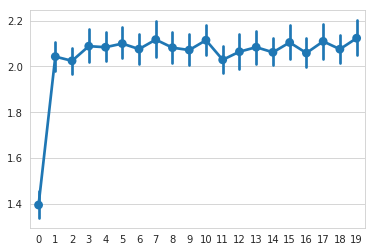

In [3]:
'''
VB-EM
'''
reward_data = []
for _ in tqdm(range(num_experiments)):
    # make agent bond
    bond = agent.VBEM(num_actions,
                      num_states,
                      discount,
                      len_episodes)
    bond.reward = np.copy(reward)
    bond.start_dist = np.copy(start_dist)

    # for every episode
    avg_reward_history = []
    for _ in range(num_episodes):
        # reset total reward per episode count
        total_reward = 0
        bond.reset()
        game = fl.make_game()
        obs = game.its_showtime()
        for _ in range(len_episodes):
            action = bond.play(utils.get_location(obs, char='O'))
            obs = game.play(action)
            if not obs[1] is None:
                total_reward += obs[1]
        #learn after the end of episode
        bond.learn(nconv=0.01)
        # add average reward to list
        avg_reward_history.append(total_reward/len_episodes)
        # quit game
        game.play(5)
    reward_data.append(avg_reward_history)
    print(avg_reward_history[-1])
    print(np.round(bond.policy, 2))

vb_reward_data = np.array(reward_data)
# plot rewards
sns.pointplot(data=vb_reward_data, ci=90)
plt.show()

4.96
[[0.11 0.73 0.99 1.   1.  ]
 [0.89 0.27 0.01 0.   0.  ]]
1.6
[[0.27 0.76 0.97 1.   1.  ]
 [0.73 0.24 0.03 0.   0.  ]]
3.16
[[0.11 0.79 1.   1.   1.  ]
 [0.89 0.21 0.   0.   0.  ]]
3.86
[[0.51 0.77 0.98 1.   1.  ]
 [0.49 0.23 0.02 0.   0.  ]]
2.22
[[0.21 0.2  0.17 0.09 1.  ]
 [0.79 0.8  0.83 0.91 0.  ]]
2.88
[[0.04 0.88 1.   1.   1.  ]
 [0.96 0.12 0.   0.   0.  ]]
2.58
[[0.25 0.75 0.99 1.   1.  ]
 [0.75 0.25 0.01 0.   0.  ]]
2.2
[[0.32 0.73 0.96 1.   1.  ]
 [0.68 0.27 0.04 0.   0.  ]]
1.66
[[0.23 0.11 0.2  0.05 1.  ]
 [0.77 0.89 0.8  0.95 0.  ]]
3.74
[[0.25 0.84 1.   1.   1.  ]
 [0.75 0.16 0.   0.   0.  ]]
3.78
[[0.4  0.81 0.99 0.98 1.  ]
 [0.6  0.19 0.01 0.02 0.  ]]
3.6
[[0.1  0.8  0.99 0.97 1.  ]
 [0.9  0.2  0.01 0.03 0.  ]]
4.9
[[0.18 0.82 0.96 0.99 1.  ]
 [0.82 0.18 0.04 0.01 0.  ]]
3.18
[[0.65 0.79 0.98 1.   1.  ]
 [0.35 0.21 0.02 0.   0.  ]]
3.1
[[0.25 0.87 0.94 1.   1.  ]
 [0.75 0.13 0.06 0.   0.  ]]
2.22
[[0.29 0.85 0.97 1.   1.  ]
 [0.71 0.15 0.03 0.   0.  ]]
3.28
[[0.26 0

3.62
[[0.53 0.78 0.97 1.   1.  ]
 [0.47 0.22 0.03 0.   0.  ]]
3.02
[[0.29 0.83 0.99 1.   1.  ]
 [0.71 0.17 0.01 0.   0.  ]]
3.44
[[0.25 0.83 0.99 1.   1.  ]
 [0.75 0.17 0.01 0.   0.  ]]
2.56
[[0.23 0.76 0.98 1.   1.  ]
 [0.77 0.24 0.02 0.   0.  ]]
3.66
[[0.26 0.75 0.99 1.   1.  ]
 [0.74 0.25 0.01 0.   0.  ]]
3.64
[[0.17 0.81 0.99 1.   1.  ]
 [0.83 0.19 0.01 0.   0.  ]]
3.54
[[0.19 0.8  0.98 1.   1.  ]
 [0.81 0.2  0.02 0.   0.  ]]
3.88
[[0.54 0.85 1.   1.   1.  ]
 [0.46 0.15 0.   0.   0.  ]]
4.52
[[0.21 0.83 0.91 1.   1.  ]
 [0.79 0.17 0.09 0.   0.  ]]
2.58
[[0.21 0.7  0.94 1.   1.  ]
 [0.79 0.3  0.06 0.   0.  ]]
2.72
[[0.48 0.77 0.96 0.99 1.  ]
 [0.52 0.23 0.04 0.01 0.  ]]
1.9
[[0.25 0.17 0.48 0.03 1.  ]
 [0.75 0.83 0.52 0.97 0.  ]]
2.76
[[0.44 0.85 0.99 1.   1.  ]
 [0.56 0.15 0.01 0.   0.  ]]
3.12
[[0.19 0.83 0.99 1.   1.  ]
 [0.81 0.17 0.01 0.   0.  ]]
3.54
[[0.35 0.79 0.92 0.98 1.  ]
 [0.65 0.21 0.08 0.02 0.  ]]
3.84
[[0.2  0.82 1.   1.   1.  ]
 [0.8  0.18 0.   0.   0.  ]]
3.74
[[0.

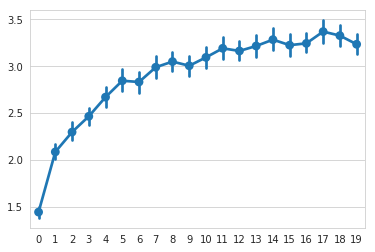

In [4]:
'''
ML-EM
'''
reward_data=[]
for _ in tqdm(range(num_experiments)):
    # make agent bond
    bond = agent.MLEM(num_actions,
                      num_states,
                      discount,
                      len_episodes)
    bond.reward = np.copy(reward)
    bond.start_dist = np.copy(start_dist)

    # for every episode
    avg_reward_history = []
    for _ in range(num_episodes):
        # reset total reward per episode count
        total_reward = 0
        bond.reset()
        game = fl.make_game()
        obs = game.its_showtime()
        for _ in range(len_episodes):
            action = bond.play(utils.get_location(obs, char='O'))
            obs = game.play(action)
            if not obs[1] is None:
                total_reward += obs[1]
        # learn after the end of episode
        bond.learn(nconv=0.01)
        # add average reward to list
        avg_reward_history.append(total_reward/len_episodes)
        # quit game
        game.play(5)
    reward_data.append(avg_reward_history)
    print(avg_reward_history[-1])
    print(np.round(bond.policy, 2))

ml_reward_data = np.array(reward_data)
# plot rewards
sns.pointplot(data=ml_reward_data, ci=90)
plt.show()

In [5]:
'''
a dumb hack to prepare data for plotting
'''
log = pd.DataFrame(columns=['episode',
                           'average-reward/time-step',
                           'EM'])
for nx in range(num_experiments):
    for ne in range(num_episodes):
        log=log.append(pd.DataFrame({'episode': ne+1,
                                    'average-reward/time-step': ml_reward_data[nx, ne],
                                    'EM': "ML-EM"}, index=[log.size+1]))
for nx in range(num_experiments):
    for ne in range(num_episodes):
        log=log.append(pd.DataFrame({'episode': ne+1,
                                    'average-reward/time-step': vb_reward_data[nx, ne],
                                    'EM': "VF-EM"}, index=[log.size+1]))

In [6]:
'''
save the reward values
'''
log.to_pickle("exp_fac.pkl")

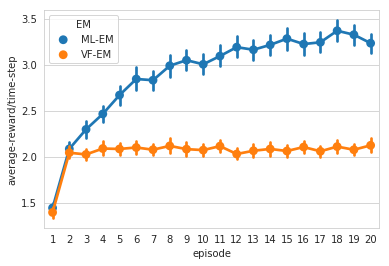

In [8]:
'''
code for plotting a good graph
'''
sns.pointplot(x="episode",
              y="average-reward/time-step",
              hue="EM",
              data=log,
              ci=90)
plt.savefig('exp_fac_result.png', dpi=600, bbox_inches="tight")